In [1]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import glob 
import copy

import astropy
from astropy.io import fits
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy import constants as c
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth
from astropy.nddata import CCDData
from tqdm import tnrange

from datetime import datetime
import copy
import numpy as np

from astropy.io import fits
from astropy import wcs
from astropy.nddata import CCDData
from ccdproc import wcs_project  # , Combiner

from matplotlib.colors import LogNorm

#from IPython.display import display, Markdown, clear_output

import inspect
import importlib
import warnings
warnings.filterwarnings('ignore')

# Plot setup
matplotlib.rc('font', size=22, family='normal', weight='bold')
plt.rcParams['figure.figsize'] = [10, 4]
np.printoptions(suppress=True)

In [2]:
# Local imports
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], 'shifty'))
import imagehandler

In [3]:
import cleaner
importlib.reload(cleaner)

<module 'cleaner' from '/arc/home/mikea/Github/shifty/shifty/cleaner.py'>

### CFHT image

In [50]:
import cleaner
importlib.reload(cleaner)
filenames=sorted(glob.glob('/arc/home/mikea/Github/shifty/dev_data/2615*.fits'))[0::]
C=cleaner.DataCleaner(filenames[:25], extno=1, EXPTIME=300, EXPUNIT='s', MAGZERO=18.,
                      MJD_START='2400000.5', GAIN=2, FILTER='-Tess', verbose=False)
C.rough_align(C.cleaned_data, 0)
#C.reproject_data(C.cleaned_data, 0)
#C.save_cleaned('clean0')

Reading image 4: /arc/home/mikea/Github/shifty/dev_data/2615565p.fits
Read 5 files!
Aligning and padding image 4
Done


In [51]:
C.subtract_background_level(C.cleaned_data)
C.save_cleaned('clean1')

Subtracting background level in image 4
Done
1

Done!


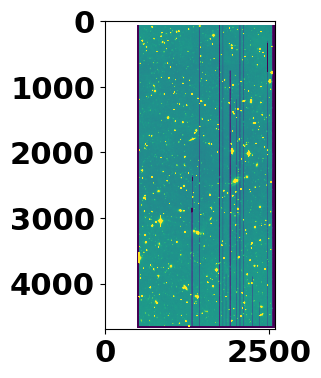

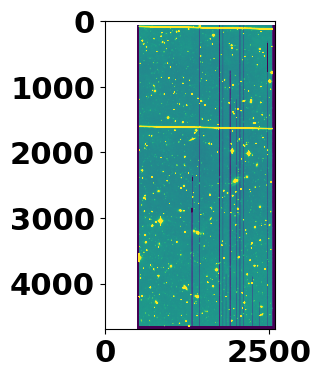

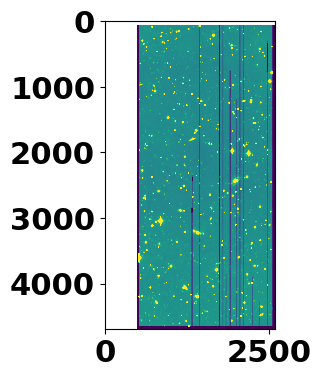

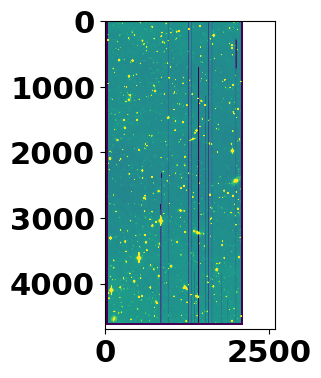

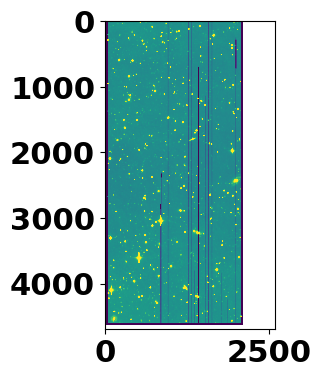

<Figure size 1000x400 with 0 Axes>

In [52]:
from astropy.visualization import (ZScaleInterval, ImageNormalize)
for i, dat in enumerate(C.cleaned_data.data):
    plt.imshow(dat, norm=ImageNormalize(dat, interval=ZScaleInterval()))
    plt.figure()

### TESS

In [4]:
import sys
import psutil
import tracemalloc

In [5]:
tracemalloc.start()

In [8]:
import cleaner
importlib.reload(cleaner)
#filenames=sorted(glob.glob('/arc/home/mikea/Github/shifty/dev_data/2615*.fits'))[0::]
#filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::]
filenames=sorted(glob.glob('/arc/home/mikea/Github/shifty/notebooks/planted_b_*.fits'))[0::]
C=cleaner.DataCleaner(filenames, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                      MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
print(tracemalloc.get_traced_memory())
C.rough_align(C.cleaned_data, 0)
print(tracemalloc.get_traced_memory())
C.reproject_data(C.cleaned_data, 0)
print(tracemalloc.get_traced_memory())
C.save_cleaned('clean00')
#C.subtract_background_level(C.cleaned_data)
#print(tracemalloc.get_traced_memory())
#C.save_cleaned('clean01')

Reading image 1107: /arc/home/mikea/Github/shifty/notebooks/planted_b_1107.fits
Read 1108 files!
Done!
(19911134404, 19911524665)
Aligning and padding image 1107
Done
(19925143734, 39597793817)
Aligning and padding image 1107
Done
Reprojecting image 1107
Done
(19924032368, 39598306454)
4

Done!


In [26]:
import cleaner
importlib.reload(cleaner)
filenames=sorted(glob.glob('/arc/home/mikea/Github/shifty/dev_data/2615*.fits'))[0::]
filenames=sorted(glob.glob('./clean00_????.fits'))[0::]
print(len(filenames), 'files')
C=cleaner.DataCleaner(filenames, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                      MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
print(tracemalloc.get_traced_memory())
C.subtract_background_level_better(C.cleaned_data)
print(tracemalloc.get_traced_memory())
C.save_cleaned('clean01')

1108 files
Reading image 1107: ./clean00_1107.fits
Read 1108 files!
Done!
(39556587066, 51507308896)
Subtracting background level in image 1107
Done
(39557068550, 51507308896)
4

Done!


In [33]:
print(tracemalloc.get_traced_memory())

(59427194032, 69139229787)


In [34]:
tracemalloc.stop()

In [4]:
import cleaner
importlib.reload(cleaner)
filenames=sorted(glob.glob('clean01_????.fits'))[0::]
C=cleaner.DataCleaner(filenames, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                      MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
print(tracemalloc.get_traced_memory())
C._subtract_donut(C.cleaned_data)
print(tracemalloc.get_traced_memory())
C.save_cleaned('clean02')

Reading image 1107: clean01_1107.fits
Read 1108 files!
Done!


NameError: name 'tracemalloc' is not defined

In [28]:
import cleaner
importlib.reload(cleaner)
filenames=sorted(glob.glob('clean01_????.fits'))[0:547:]
C=cleaner.DataCleaner(filenames, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                      MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
print(tracemalloc.get_traced_memory())
C._subtract_donut(C.cleaned_data)
print(tracemalloc.get_traced_memory())
C.save_cleaned('clean02_a')
filenames=sorted(glob.glob('clean01_????.fits'))[547::]
C=cleaner.DataCleaner(filenames, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                      MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
print(tracemalloc.get_traced_memory())
C._subtract_donut(C.cleaned_data)
print(tracemalloc.get_traced_memory())
C.save_cleaned('clean02_b')

Reading image 546: clean01_0546.fits
Read 547 files!
Done!
(71702227179, 71702423240)
Subtracting template from image 546
Done
(71702547634, 86798221070)
3

Done!
Reading image 560: clean01_1107.fits
Read 561 files!
Done!
(71953087055, 86798221070)
Subtracting template from image 560
Done
(71953420430, 87297656434)
3

Done!


In [25]:
C

In [4]:
import sys
import psutil
import tracemalloc
import cleaner
tracemalloc.start()
importlib.reload(cleaner)
filenames=sorted(glob.glob('clean02_????.fits'))[0::]
print(f'Reading {len(filenames)} files.')
C=cleaner.DataCleaner(filenames, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                      MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
print(tracemalloc.get_traced_memory())

Reading 1108 files.
Reading image 1107: clean02_1107.fits
Read 1108 files!
Done!
(19845125778, 19845515489)


In [32]:
import sys
import psutil
import tracemalloc
import cleaner
tracemalloc.start()
importlib.reload(cleaner)
filenames=sorted(glob.glob('clean02_?_???.fits'))[0::]
print(f'Reading {len(filenames)} files.')
try:
    del C
except:
    pass
C=cleaner.DataCleaner(filenames, extno=0, EXPTIME='EXPOSURE', EXPUNIT='d', MAGZERO=18.,
                      MJD_START='BJDREFI+TSTART+-2400000.5', GAIN='GAINA', FILTER='-Tess', verbose=False)
print(tracemalloc.get_traced_memory())

Reading 1108 files.
Reading image 1107: clean02_b_560.fits
Read 1108 files!
Done!
(49551727541, 87297656434)


In [33]:
del data

In [ ]:
data = copy.deepcopy(C.cleaned_data.data)
filenames_raw=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::]
for i, d in enumerate(data):
    data[i] -= np.nanmedian(d)

for i in np.arange(5):
    std_all = np.nanstd(data)
    print(std_all)
    for i, d in enumerate(data):
        std_d = np.nanstd(d)
        print(f'{i: 5.0f} {filenames_raw[i].split("/")[9]} {std_d: 6.1f} {np.nanmedian(d): 6.2f} {np.sum([d>5*std_d]): 7.0f} {np.sum([d<-5*std_d]): 7.0f} {np.sum([d>5*std_all]): 7.0f} {np.sum([d<-5*std_all]): 7.0f}')
        data[i][d<-5*std_all] = np.nan
        data[i][d>5*std_all] = np.nan
        data[i][d<-5*std_d] = np.nan
        data[i][d>5*std_d] = np.nan
        data[i] -= np.nanmedian(d)
        d = data[i]
        std_d = np.nanstd(d)
        print(f'{i: 5.0f}                                              {std_d: 6.1f} {np.nanmedian(d): 6.2f} {np.sum([d>5*std_d]): 7.0f} {np.sum([d<-5*std_d]): 7.0f} {np.sum([d>5*std_all]): 7.0f} {np.sum([d<-5*std_all]): 7.0f}')

68.66812
    0 tess2018319225938-s0005-1-4-0125-s_ffic.fits   45.5   0.00    1290     817     887     467
    0                                                 4.7   0.00    7052    8157       0       0
    1 tess2018319232938-s0005-1-4-0125-s_ffic.fits   40.2   0.00    1317     895     830     467
    1                                                 4.3   0.00    7156    8370       0       0
    2 tess2018319235938-s0005-1-4-0125-s_ffic.fits   35.5   0.00    1594    1095     891     468
    2                                                 4.1   0.00    7780    9243       0       0
    3 tess2018320002938-s0005-1-4-0125-s_ffic.fits   29.9   0.00    1738    1277     834     450
    3                                                 3.7   0.00    8094    9620       0       0
    4 tess2018320005938-s0005-1-4-0125-s_ffic.fits   26.0   0.00    2082    1636     885     484
    4                                                 3.5   0.00    8844   10558       0       0
    5 tess20183200129

In [44]:
data = copy.deepcopy(C.cleaned_data.data)
filenames_raw=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::]
for i, d in enumerate(data):
    data[i] -= np.nanmedian(d)

for i in np.arange(5):
    std_all = np.nanstd(data)
    print(std_all)
    for i, d in enumerate(data):
        std_d = np.nanstd(d)
        print(f'{i: 5.0f} {filenames_raw[i].split("/")[9]} {std_d: 6.1f} {np.nanmedian(d): 6.2f} {np.sum([d>5*std_d]): 7.0f} {np.sum([d<-5*std_d]): 7.0f} {np.sum([d>5*std_all]): 7.0f} {np.sum([d<-5*std_all]): 7.0f}')
        data[i][d<-5*std_all] = np.nan
        data[i][d>5*std_all] = np.nan
        data[i][d<-5*std_d] = np.nan
        data[i][d>5*std_d] = np.nan
        data[i] -= np.nanmedian(d)
        d = data[i]
        std_d = np.nanstd(d)
        print(f'{i: 5.0f}                                              {std_d: 6.1f} {np.nanmedian(d): 6.2f} {np.sum([d>5*std_d]): 7.0f} {np.sum([d<-5*std_d]): 7.0f} {np.sum([d>5*std_all]): 7.0f} {np.sum([d<-5*std_all]): 7.0f}')

68.6621
    0 tess2018319225938-s0005-1-4-0125-s_ffic.fits   45.5   0.00    1269     817     878     467
    0                                                 4.7   0.00    6848    8209       0       0
    1 tess2018319232938-s0005-1-4-0125-s_ffic.fits   40.2   0.00    1294     895     820     467
    1                                                 4.2   0.00    6965    8419       0       0
    2 tess2018319235938-s0005-1-4-0125-s_ffic.fits   35.5   0.00    1567    1095     881     468
    2                                                 4.1   0.00    7584    9280       0       0
    3 tess2018320002938-s0005-1-4-0125-s_ffic.fits   29.9   0.00    1704    1279     823     450
    3                                                 3.6   0.00    7901    9668       0       0
    4 tess2018320005938-s0005-1-4-0125-s_ffic.fits   26.0   0.00    2045    1638     876     484
    4                                                 3.5   0.00    8626   10626       0       0
    5 tess201832001293

In [19]:
np.nanstd(data)

0.38779557

In [18]:
print(1)

1


In [26]:
np.shape(data[0])[0]*np.shape(data[0])[1]

4438608

In [30]:
m = []
for i, d in enumerate(data):
    m.append(np.sum(np.isnan(d))/(np.shape(data[0])[0]*np.shape(data[0])[1]))
    print(f'{m[i]*100:3.0f}')
print(np.mean(m), np.std(m))

  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0


In [29]:
C.cleaned_data.data = data

In [30]:
C.save_cleaned('clean03')

4

Done!
